In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
cities = pd.read_csv('/content/dim_cities.csv')
respondents = pd.read_csv('/content/dim_repondents.csv')
responses = pd.read_csv('/content/fact_survey_responses.csv')

In [96]:
cities.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [97]:
respondents.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [98]:
respondents.shape

(10000, 5)

In [99]:
responses.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [100]:
respondents_cities = pd.merge(respondents, cities, on='City_ID', how='left')

In [101]:
respondents_cities.head()

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,120033,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,120034,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,120035,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2


In [102]:
respondents_cities.shape

(10000, 7)

In [103]:
combined_data = pd.merge(respondents_cities, responses, on='Respondent_ID', how='left')
combined_data.head()

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2,103001,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2,103002,2-3 times a month,Throughout the day,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1,103003,Rarely,Before exercise,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1,103004,2-3 times a week,To stay awake during work/study,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2,103005,Daily,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [105]:
combined_data.shape

(10000, 29)

In [106]:
combined_data.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'City', 'Tier',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

# Demographic Insights (examples)
### a. Who prefers energy drink more? (male/female/non-binary?)

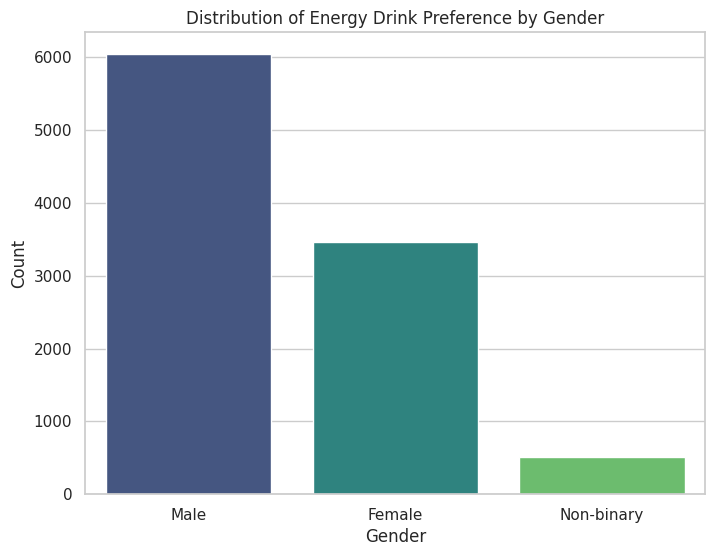

In [108]:
gender_counts = combined_data['Gender'].value_counts()

# Plotting using Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

plt.title('Distribution of Energy Drink Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### b. Which age group prefers energy drinks more?

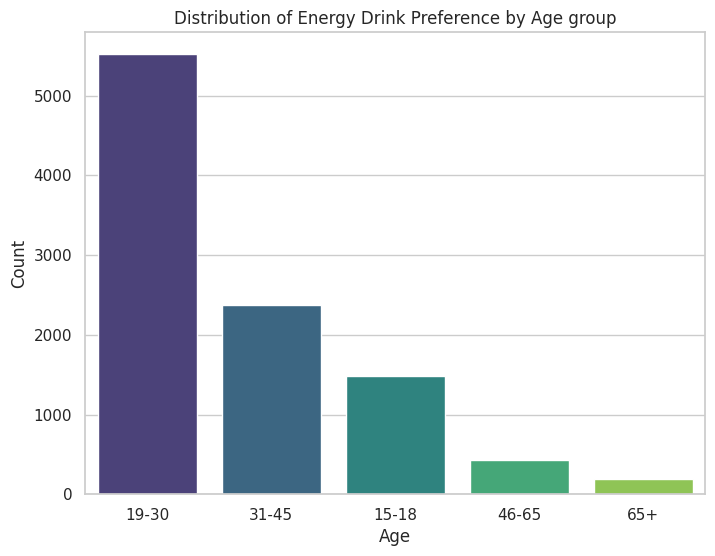

In [109]:
age_counts = combined_data['Age'].value_counts()

# Plotting using Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

plt.title('Distribution of Energy Drink Preference by Age group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### c. Which type of marketing reaches the most Youth (15-30)?

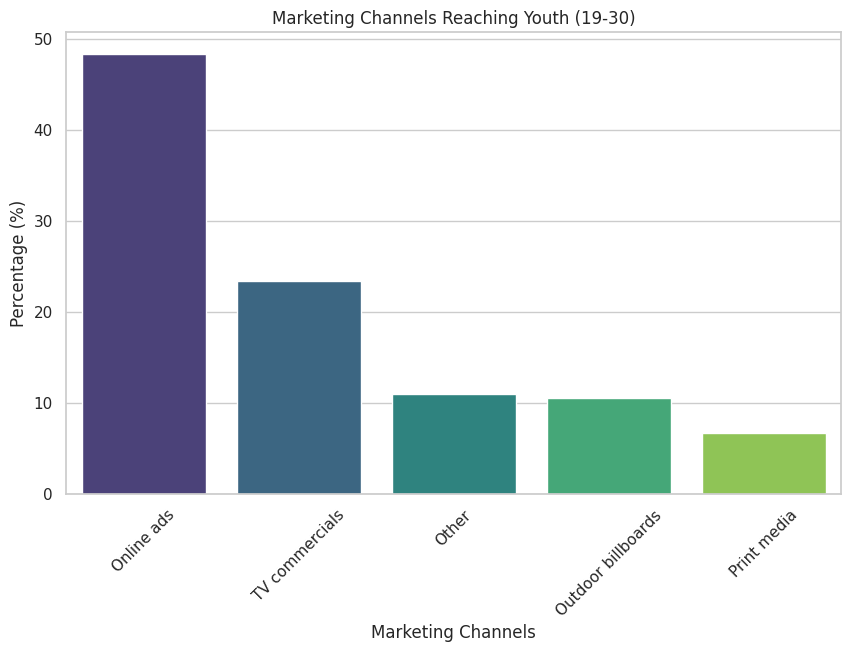

In [110]:
youth_data = combined_data[(combined_data['Age'] == '19-30')]
youth_marketing_channels = youth_data['Marketing_channels'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=youth_marketing_channels.index, y=youth_marketing_channels.values, palette='viridis')
plt.title('Marketing Channels Reaching Youth (19-30)')
plt.xlabel('Marketing Channels')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


# Consumer Preferences:
### a. What are the preferred ingredients of energy drinks among respondents?

In [114]:
ingredient_counts = combined_data['Ingredients_expected'].value_counts()
ingredient_percentages = combined_data['Ingredients_expected'].value_counts(normalize=True) * 100

ingredient_summary = pd.DataFrame({
    'Ingredients_expected': ingredient_counts.index,
    'Count': ingredient_counts.values,
    'Percentage (%)': ingredient_percentages.values})

ingredient_summary


,Ingredients_expected,Count,Percentage (%)
0,Caffeine,3896,38.96
1,Vitamins,2534,25.34
2,Sugar,2017,20.17
3,Guarana,1553,15.53


### b. What packaging preferences do respondents have for energy drinks?


In [113]:
packaging_pre_count = combined_data['Packaging_preference'].value_counts()
packaging_pre_percentage = combined_data['Packaging_preference'].value_counts(normalize=True) * 100

ingredient_summary = pd.DataFrame({
    'Packaging_preference': packaging_pre_count.index,
    'Count': packaging_pre_count.values,
    'Percentage (%)': packaging_pre_percentage.values})

ingredient_summary


,Packaging_preference,Count,Percentage (%)
0,Compact and portable cans,3984,39.84
1,Innovative bottle design,3047,30.47
2,Collectible packaging,1501,15.01
3,Eco-friendly design,983,9.83
4,Other,485,4.85


# Competition Analysis:
### a. Who are the current market leaders?

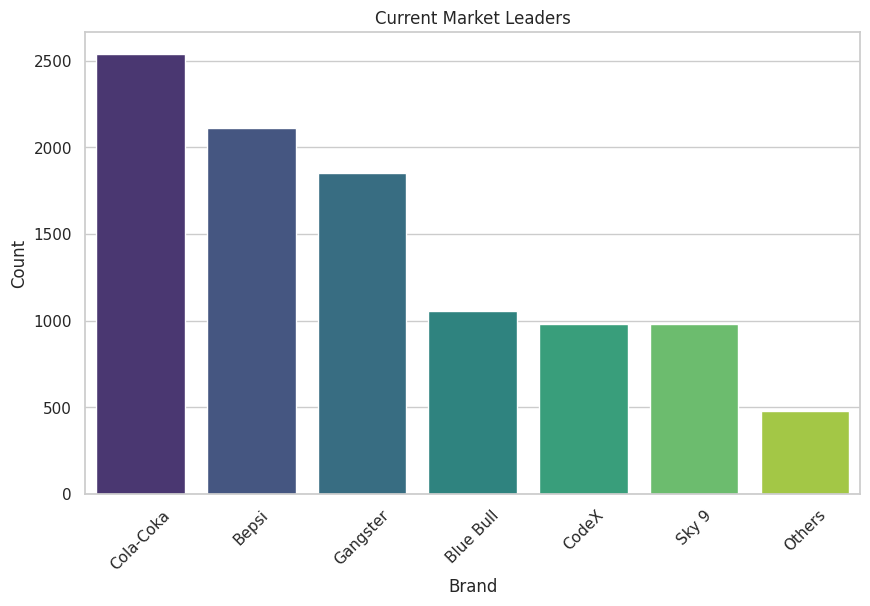

In [112]:
brand_counts = combined_data['Current_brands'].value_counts()

# Calculate the percentage for each brand
brand_percentages = combined_data['Current_brands'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')

plt.title('Current Market Leaders')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### b. What are the primary reasons consumers prefer those brands over ours?

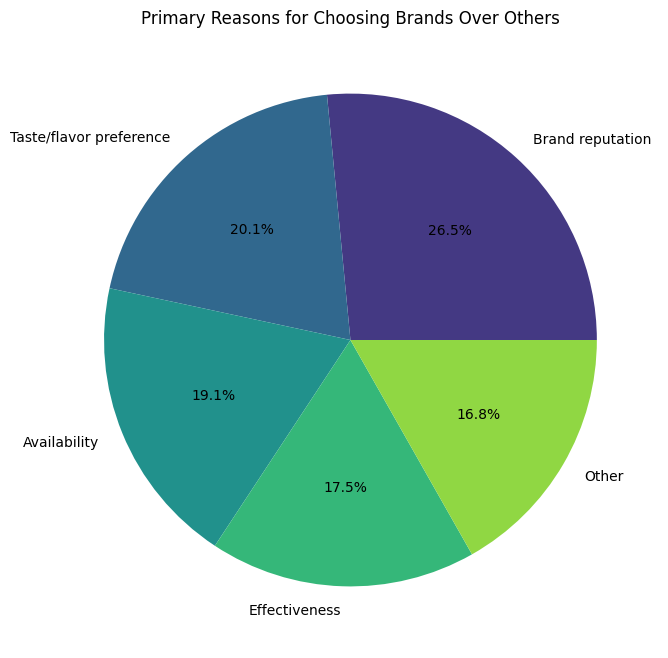

In [ ]:

reason_counts = combined_data['Reasons_for_choosing_brands'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(reason_counts)))

plt.title('Primary Reasons for Choosing Brands Over Others')
plt.show()


# Marketing Channels and Brand Awareness:
### a. Which marketing channel can be used to reach more customers?


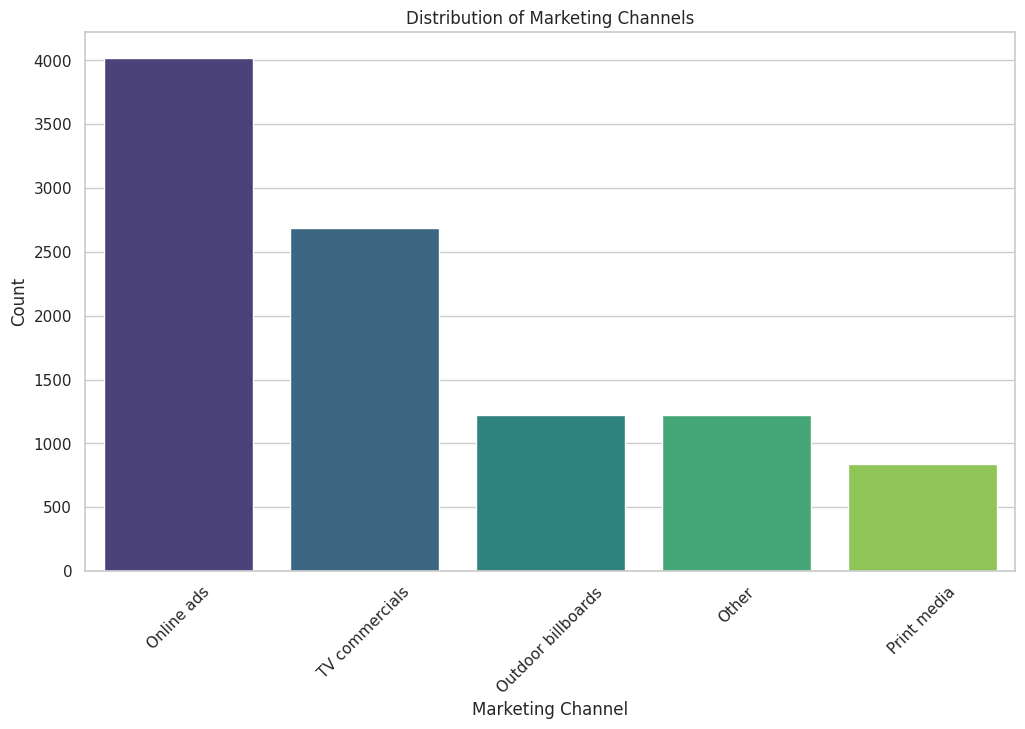

In [115]:
channel_counts = combined_data['Marketing_channels'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')

plt.title('Distribution of Marketing Channels')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### b. How effective are different marketing strategies and channels in reaching our customers?

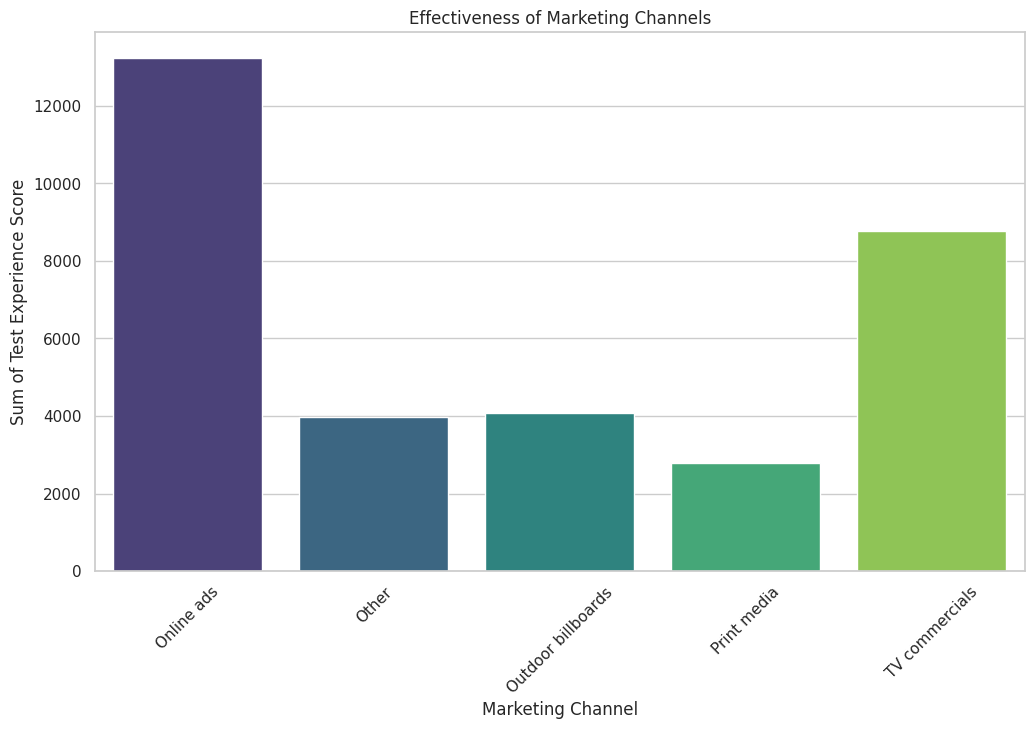

In [117]:
channel_effectiveness = combined_data.groupby('Marketing_channels')['Taste_experience'].sum()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=channel_effectiveness.index, y=channel_effectiveness.values, palette='viridis')

plt.title('Effectiveness of Marketing Channels')
plt.xlabel('Marketing Channel')
plt.ylabel('Sum of Test Experience Score')
plt.xticks(rotation=45)
plt.show()

# Brand Penetration:
### a. Which cities do we need to focus more on?


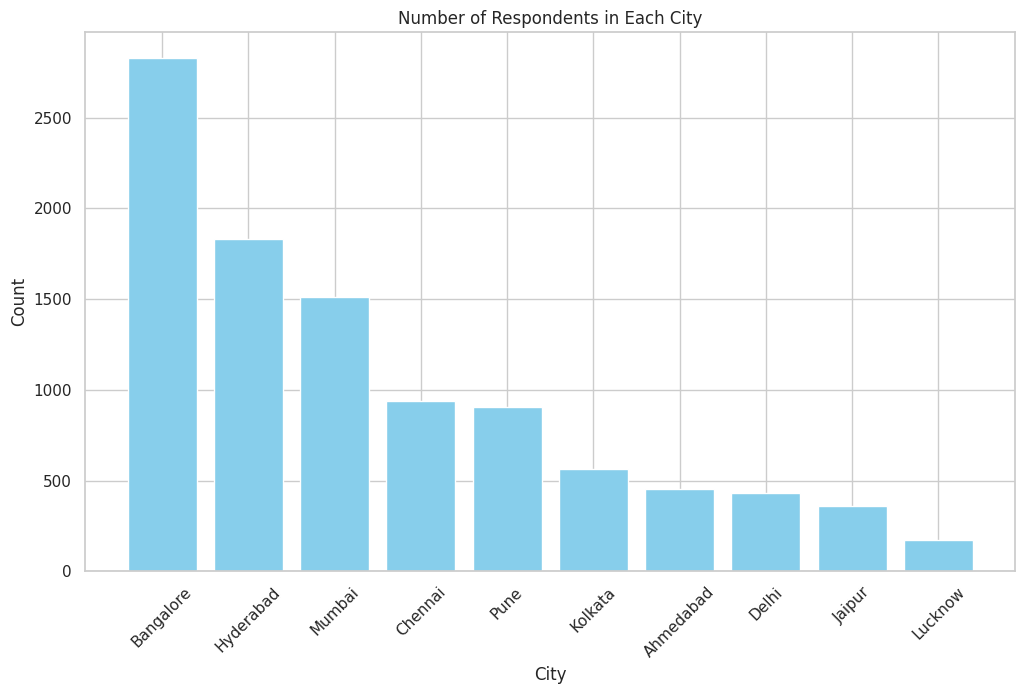

In [118]:
city_summary = combined_data['City'].value_counts().reset_index()
city_summary.columns = ['City', 'Count']

plt.figure(figsize=(12, 7))
plt.bar(city_summary['City'], city_summary['Count'], color='skyblue')

plt.title('Number of Respondents in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Purchase Behavior:
### a. Where do respondents prefer to purchase energy drinks?

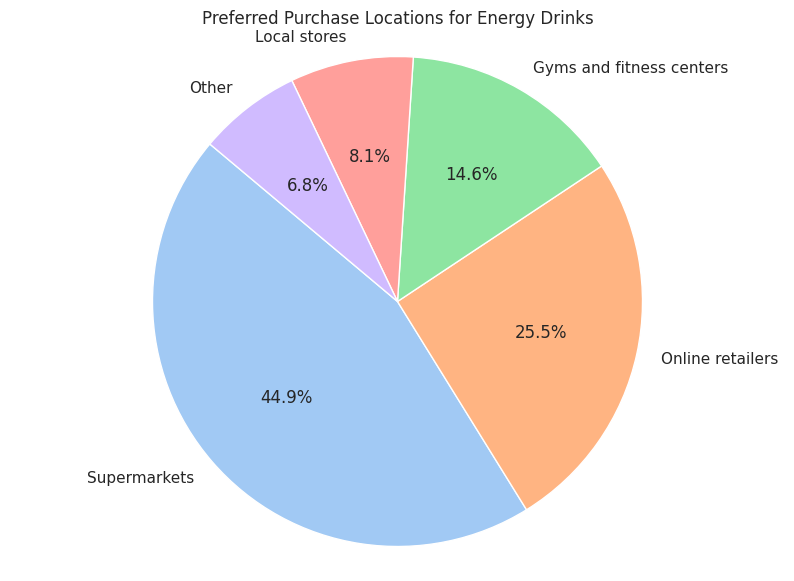

In [119]:
purchase_location_counts = combined_data['Purchase_location'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 7))
plt.pie(purchase_location_counts, labels=purchase_location_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title('Preferred Purchase Locations for Energy Drinks')
plt.axis('equal')

plt.show()

### b. What are the typical consumption situations for energy drinks among respondents?


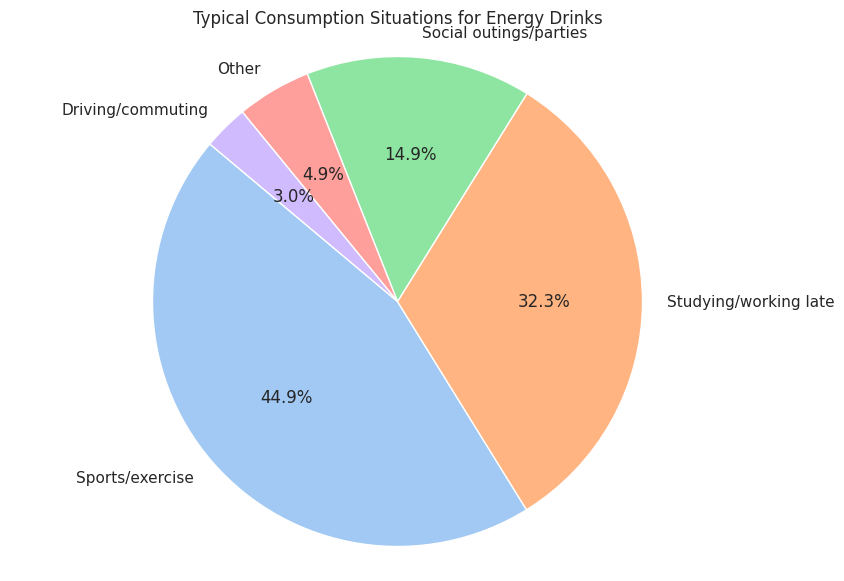

In [120]:
consumption_situations_counts = combined_data['Typical_consumption_situations'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 7))
plt.pie(consumption_situations_counts, labels=consumption_situations_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title('Typical Consumption Situations for Energy Drinks')
plt.axis('equal')

plt.show()

### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?


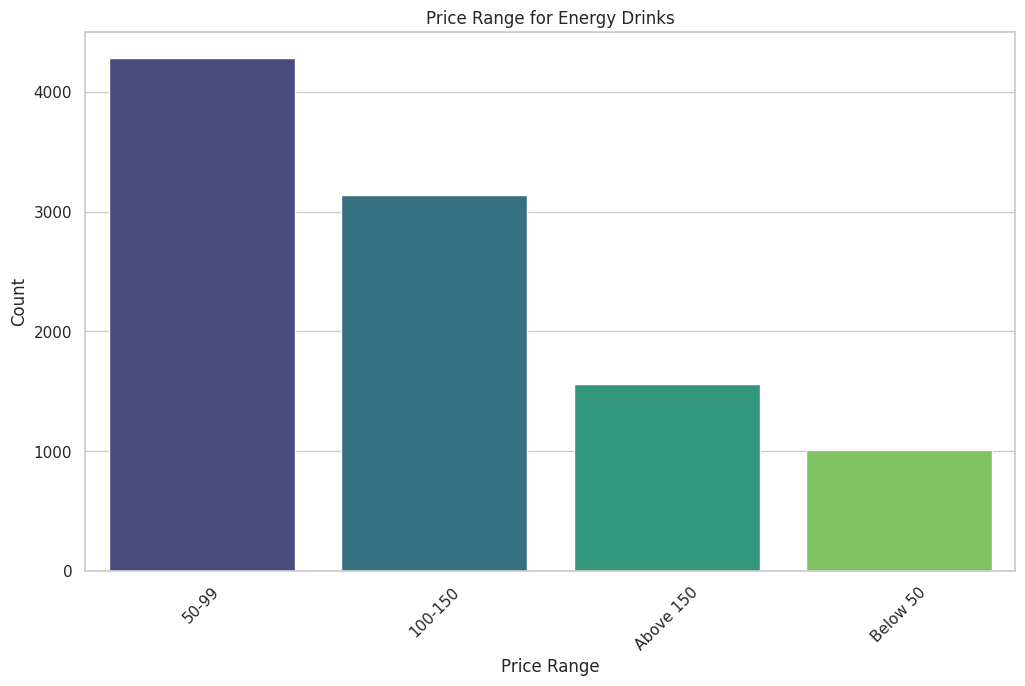

In [ ]:
price_range_counts = combined_data['Price_range'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')

plt.title('Price Range for Energy Drinks')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()